# Исследование объявлений о продаже квартир

<a id=0></a>
[Содержание](#0)

[1. Описание проекта](#1)

[2. Анализ данных](#2)

[3. Исследовательский анализ данных](#3)

[4. Итоговый вывод](#4)

<a id=1></a>
## 1. Описание проекта

В вашем распоряжении данные сервиса `Яндекс.Недвижимость` — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Данные**

Датасет сервиса `Яндекс.Недвижимость` — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Цель проекта**

Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Сформулировать выводы и построить наглядные диаграммы.

<a id=2></a>
[Содержание](#0)
## 2. Анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


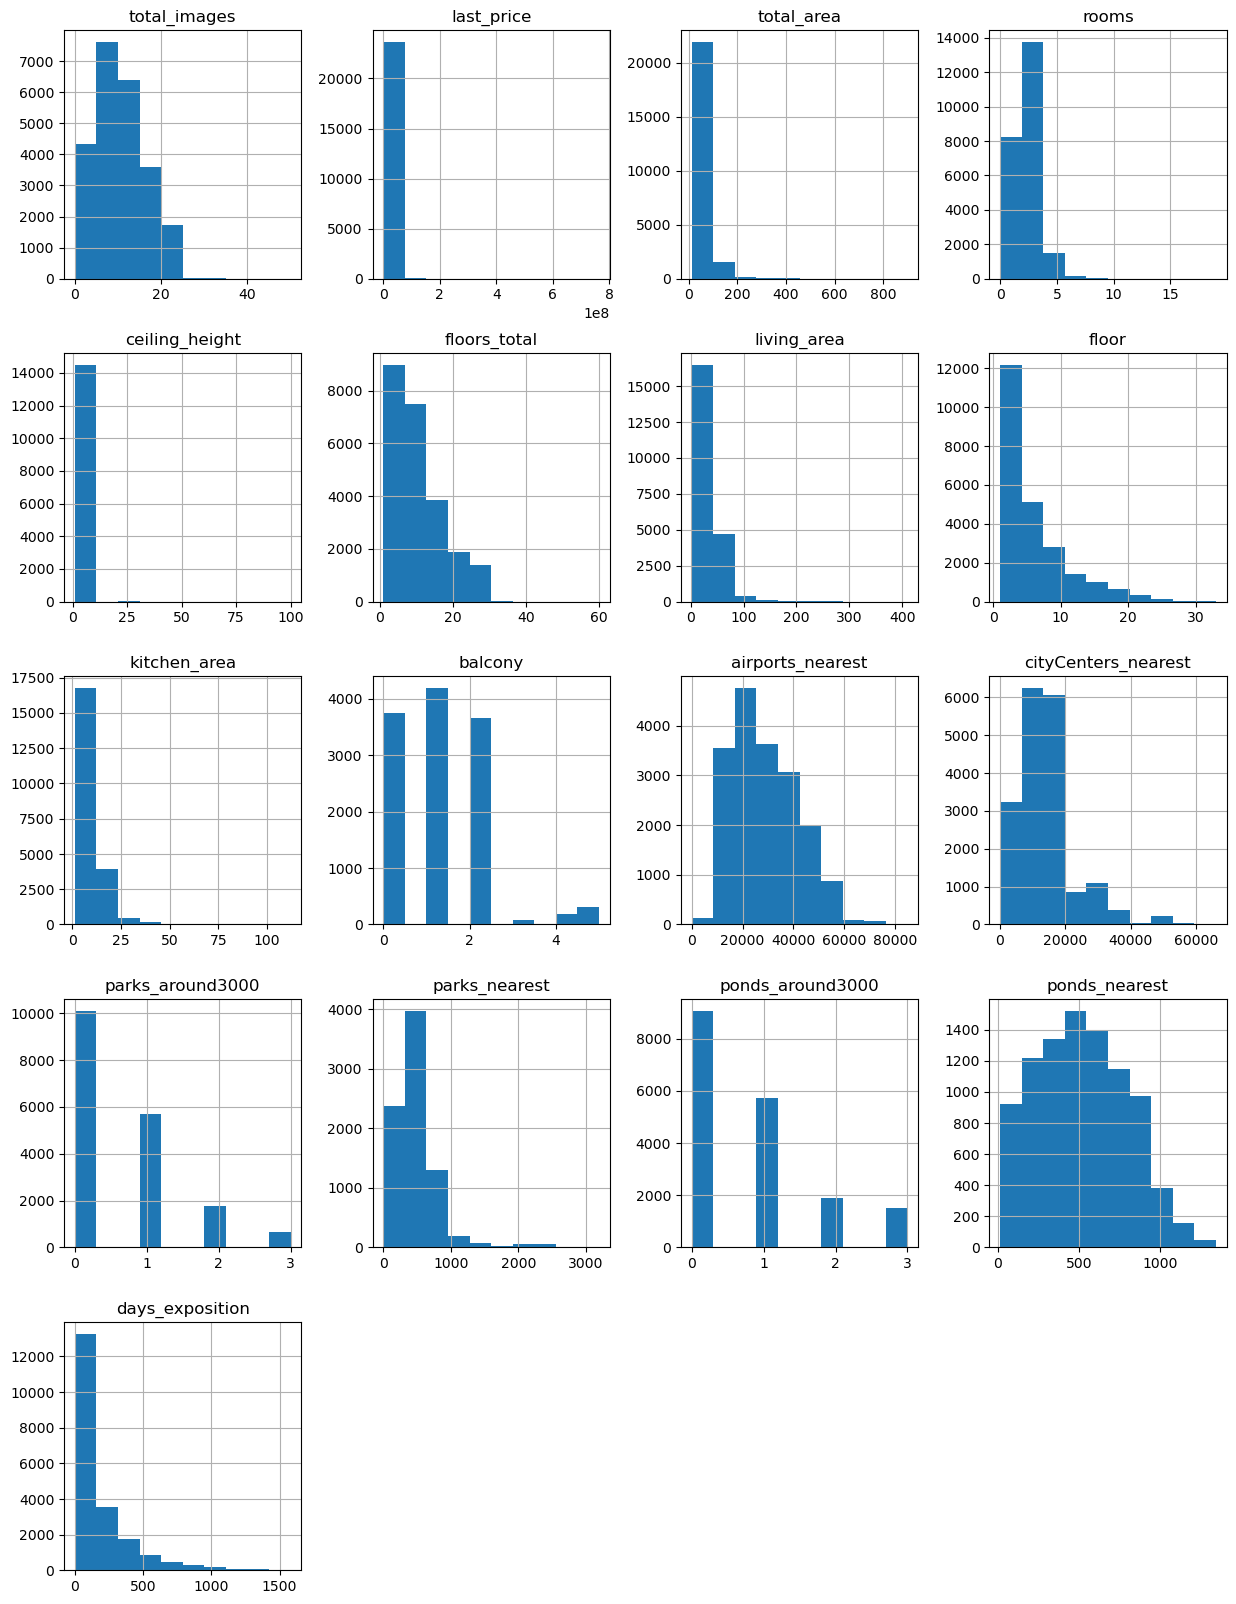

In [5]:
data.hist(figsize = (15, 20))
plt.show()

### Предобработка данных

Посмотрим кол-во пропусков в колонках и посчитаем их в %

In [6]:
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В колонках есть пустые значения, заменим их на подходящие, где можно.
Пропуски в данных могут возникать из-за необязательности заполнения полей (например в форме на сайте), из-за ошибок в коде программ или при переносе данных.
Заполнение пропусков в количественных переменных значением медианы не вносит искажения в данные.

Пропуски в колоках Высота потолков `ceiling_height` и общее кол-во этажей `floors_total` можно заполнить на медианное значение.

В колонки типа `is_apartment` или `balcony` заполняем значением, обозначающим в каждом конкреном случае, отсутвие у квартиры того или иного признака, балкона, например.

Колонки Площадь кухни `kitchen_area` и Жилую площадь `living_area` я попытался расчитать от общей площади квартиры, как соотношение их медиан (1.7), например если общая 55 кв.м., то жилая будет 32 кв.м., если общая 150 кв.м., то жилая - 88 кв.м.

In [8]:
# Заменяем пропуски на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())

# В этих колонках я бы тоже заменил пропуски на медианное значение,
# но в задании рекомендуют их оставить
#data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())
#data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].mean())
#data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].mean())
#data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean())

# Заменяем пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)

# Заменяем пропуски на значение по умолчанию, суть не меняется, но так красиво
data['locality_name'] = data['locality_name'].fillna('Город не указан')

# Заменяем пропуски на 0
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# Заменяем пропуски на расчитанное значение от Общей площади квартиры, поделив последнюю на коэффициент соотношения медиан
data['living_area'] = data['living_area'].fillna(data['total_area'] / (data['total_area'].mean() / data['living_area'].mean()))
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / (data['total_area'].mean() / data['kitchen_area'].mean()))

In [9]:
display(pd.DataFrame(round(data.isna().mean() * 100,)).style.background_gradient('coolwarm'))

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Для оптимизации используемого объема данных датасета изменим типы данных.
Получив Min и Max значения в колоках вызвав метот data.describe() можно определить какие колонки можно привести к типам:

*int8* - `total_images`, `rooms`, `floors_total`, `floor`, `balcony`, `parks_around3000`, `ponds_around3000`, т к числа в них целые и никогда не будут больше 128;

*float16* - `total_area`, `ceiling_height`, `living_area`, `kitchen_area`, т к числа в них измеряются в метрах и метрах квадратных, включая дробную часть, и размерности типа достаточно.

*bool_* - `is_apartment`, т к информация в колонке типа Истина или Ложь.

*to_datetime* - `first_day_exposition`, причем оставляем только дату, т к время первой экспозии не важно.

In [10]:
data['total_images'] = np.int8(data['total_images'])
# дробную часть отбрасываем, не иформативно
data['last_price'] = np.int32(data['last_price'])
data['total_area'] = np.float16(data['total_area'])
# время отбрасываем, не иформативно
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['rooms'] = np.int8(data['rooms'])
data['ceiling_height'] = np.float16(data['ceiling_height'])
# дробную часть отбрасываем, не иформативно
data['floors_total'] = np.int8(data['floors_total'])
data['living_area'] = np.float16(data['living_area'])
data['floor'] = np.int8(data['floor'])
data['is_apartment'] = np.bool_(data['is_apartment'])
data['kitchen_area'] = np.float16(data['kitchen_area'])
data['balcony'] = np.int8(data['balcony'])
data['parks_around3000'] = np.int8(data['parks_around3000'])
data['ponds_around3000'] = np.int8(data['ponds_around3000'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float16       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23699 non-null  int8          
 7   living_area           23699 non-null  float16       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float16       
 13  balcony         

Уменьшили объем датасета с 3.7мб до 1.8мб

In [12]:
display(data.query('ceiling_height > 5 or ceiling_height < 2').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.1875,2018-07-12,2,25.000000,5,32.000000,2,False,...,9.671875,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
464,15,66571000,280.2500,2015-06-11,6,5.199219,8,159.500000,7,False,...,21.093750,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0
1026,20,155000000,310.0000,2018-10-12,5,5.300781,3,190.000000,3,False,...,63.000000,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN
1388,20,59800000,399.0000,2015-01-21,5,5.601562,6,227.875000,6,False,...,69.875000,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0
3148,14,2900000,75.0000,2018-11-12,3,32.000000,3,53.000000,2,False,...,8.000000,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
3474,3,1400000,30.0000,2018-03-16,1,8.000000,5,15.296875,2,False,...,7.300781,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0
4643,0,4300000,45.0000,2018-02-01,2,25.000000,9,30.000000,2,False,...,7.000000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000,25.0000,2017-09-27,0,27.000000,25,17.000000,17,False,...,4.378906,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0
5076,0,3850000,30.5000,2018-10-03,1,24.000000,5,19.500000,1,True,...,5.500000,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000,54.0000,2017-10-13,2,27.000000,5,30.000000,3,False,...,9.000000,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0


Исправим ошибочно введенные значения в колонке `ceiling_height` в диаппазоне 20-32, в которых не поставили точку.

Для остальных значений превышающих 9 метров, что уже аномально и может быть только в элитных двухуровневых квартирах, установим значение 9 м.

In [13]:
data.loc[(data['ceiling_height'] > 20) &
         (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] / 10
data.loc[data['ceiling_height'] > 9, 'ceiling_height'] = 9

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float16       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23699 non-null  int8          
 7   living_area           23699 non-null  float16       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float16       
 13  balcony         

In [15]:
#display(data.query('floor > floors_total'))
data.loc[(data['floors_total'] < data['floor'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348,70.812500,2015-08-01,2,2.771484,10,38.406250,12,False,...,10.632812,0,Санкт-Петербург,37364.0,8322.0,2,309.0,2,706.0,727.0
2392,7,5395770,53.000000,2017-06-29,2,2.771484,10,29.000000,22,False,...,9.000000,0,Санкт-Петербург,43074.0,10820.0,0,NaN,0,NaN,48.0
2846,4,2325000,27.796875,2016-09-21,1,2.771484,10,19.406250,15,False,...,4.867188,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,307.0
3031,9,6400000,56.687500,2018-03-27,2,2.771484,10,32.000000,12,False,...,12.000000,0,Кудрово,NaN,NaN,0,NaN,0,NaN,231.0
3438,10,4100000,38.000000,2018-04-14,1,2.771484,10,19.000000,12,False,...,10.296875,0,Кудрово,NaN,NaN,0,NaN,0,NaN,95.0
4617,4,4275062,61.187500,2017-04-27,2,2.771484,10,32.000000,12,False,...,12.203125,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,72.0
4848,15,13000000,98.000000,2017-02-08,3,2.771484,10,55.968750,18,False,...,17.171875,0,Санкт-Петербург,37625.0,14153.0,0,NaN,0,NaN,29.0
5146,10,3085024,33.343750,2018-10-06,1,2.771484,10,11.000000,12,False,...,5.835938,0,Санкт-Петербург,47303.0,25865.0,1,400.0,1,492.0,140.0
5187,5,3300000,25.406250,2018-11-02,0,2.771484,10,14.500000,15,False,...,4.449219,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,3.0
5784,4,4262941,59.906250,2017-04-02,2,2.771484,10,31.703125,18,False,...,11.898438,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,127.0


Исправим ошибочно введенные значения в колонке `floors_total`, где значение меньше, чем в колонке `floor`. Исходим из предположения, что на каком этаже продается квартира клиенто указал точно, а сколько этажей доме ввел по невнимательности или вообще не ввел, а программа взяла значение по умолчанию.

In [16]:
data.loc[(data['floors_total'] < data['floor']), 'floors_total'] = data['floor']

Проверим на явные дубликаты

In [17]:
print(data.duplicated().sum())
# data = data.drop_duplicates()

0


Проверим на неявные дубликаты в названии населенных пунктов

In [18]:
display(len(data['locality_name'].unique()))
display(data['locality_name'].sort_values().unique())

365

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Город не указан', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
     

Приведем названия населенных пунктов к одному формату и уберем дубликаты с разным написанием

In [19]:
duplicates_name = {'поселок':'посёлок', 'городской посёлок':'посёлок', 'коттеджный посёлок городского типа':'посёлок',
                   'посёлок городского типа':'посёлок', 'посёлок при железнодорожной':'поселок станции',
                  'садоводческое некоммерческое товарищество':'садовое товарищество'}
data['locality_name'] = data['locality_name'].replace(duplicates_name, regex = True)

**Вывод:**

- Заполнил основную часть пропусков, оставив только пропуски в колонках: `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` и `days_exposition`, т к их нечем заполнить и они менее значимы.

- Уменьшили объем датасета с 3.7 мб до 1.8 мб.

- Проверил датасет на явные и неявные дубликаты и внес исправления в данные.

- Датасет готов для дополнения и аналитики.

### Посчитаем и добавим в таблицу новые столбцы

In [20]:
# цена одного квадратного метра
data['price_metr'] = data['last_price'] / data['total_area']

# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['1day_week_exposition'] = data['first_day_exposition'].dt.weekday

# месяц публикации объявления
data['1day_month_exposition'] = data['first_day_exposition'].astype('datetime64[M]')

# год публикации объявления
data['1day_year_exposition'] = data['first_day_exposition'].dt.year

# тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'

    except:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)

#расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

<a id=3></a>
[Содержание](#0)
## 3. Исследовательский анализ данных

In [21]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,1day_week_exposition,1day_year_exposition,cityCenters_nearest_km
count,23699.000000,2.369900e+04,23699.000,23699.000000,23699.000000,23699.000000,23699.00000,23699.000000,2.369900e+04,23699.000000,...,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,18180.000000
mean,9.858475,6.541549e+06,inf,2.070636,2.746094,10.680746,inf,5.892358,inf,0.591080,...,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634,9.942165e+04,2.569307,2017.367146,14.184818
std,5.682529,1.088701e+07,inf,1.078405,0.244141,6.590869,inf,4.885249,6.042969e+00,0.959298,...,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988,5.030635e+04,1.789082,1.039771,8.616194
min,0.000000,1.219000e+04,12.000,0.000000,1.000000,1.000000,2.00000,1.000000,1.299805e+00,0.000000,...,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000,1.000000,2.599609,5.000000,19.00000,2.000000,7.000000e+00,0.000000,...,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.659814e+04,1.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000,2.000000,2.771484,9.000000,30.00000,4.000000,9.000000e+00,0.000000,...,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,3.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.875,3.000000,2.771484,16.000000,42.09375,8.000000,1.200000e+01,1.000000,...,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142612e+05,4.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000,19.000000,9.000000,60.000000,409.75000,33.000000,1.120000e+02,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,2019.000000,66.000000


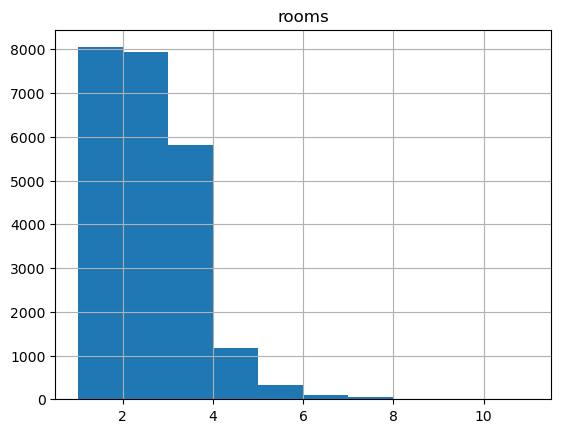

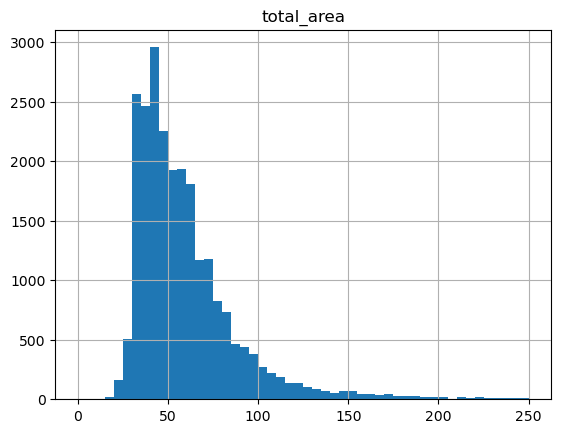

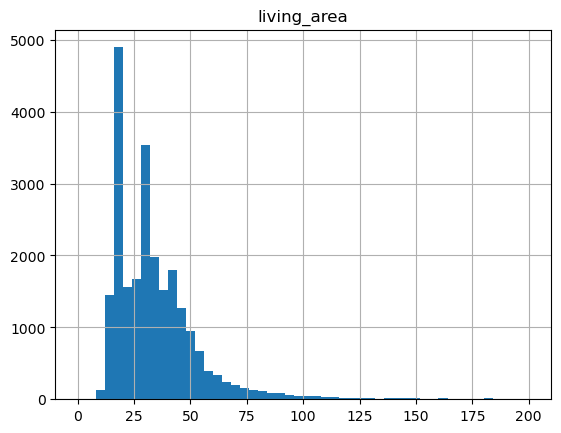

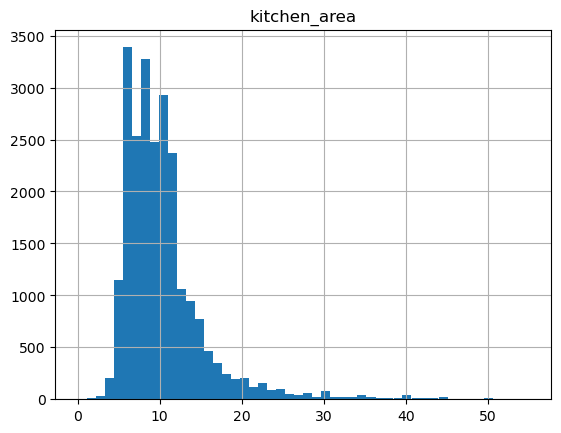

In [22]:
data.hist('rooms', bins = 10, range = (1, 11))               # кол-во комнат
plt.show()
data.hist('total_area', bins = 50, range = (0, 250))         # общая площадь
plt.show()
data.hist('living_area', bins = 50, range = (0, 200))        # жилая площадь
plt.show()
data.hist('kitchen_area', bins = 50, range = (0, 55))        # площадь кухни
plt.show()

Основное кол-во квартир на рынке составляют однокомнатные и двухкомнатные квартиры площадью 40-50 кв.м.

Трехкомнатных квартир на 25% меньше каждой из них. Квартир с кол-вом комнат большим 3 значительно меньше.

Основное кол-во кухонь имеют размер в пределах от 7 до 12 кв.м.

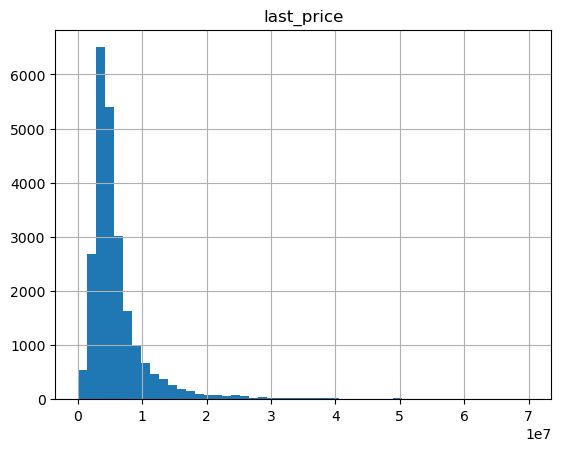

In [23]:
data.hist('last_price', bins = 50, range = (0, 70000000))     # последняя цена объекта
plt.show()

Медианное значение стоимости квартир находится на 4.65 млн.руб, основное кол-во квартир имеют цену в пределах от 3.4 до 6.8 млн.руб.

Но этот параметр дает приблизительную оценку стоимости квартир, т к зависит от населенного пункта и последняя указанная на сайте цена не является ценой сделки, которая обычно немного меньше.

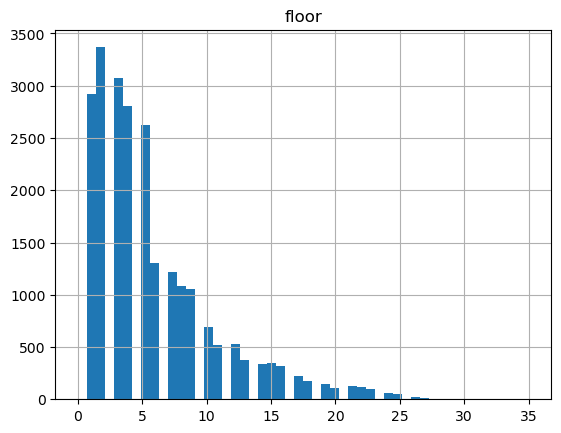

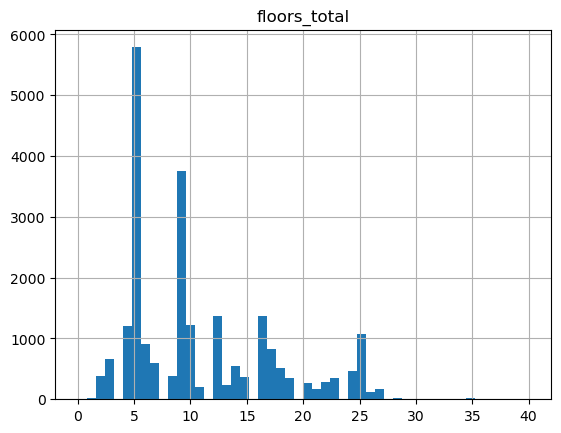

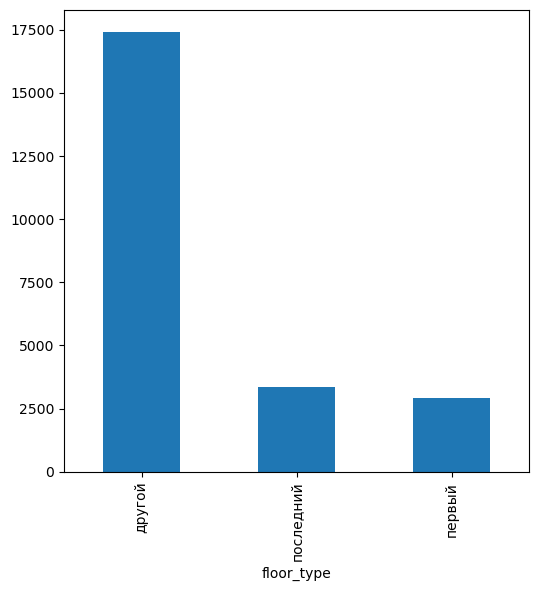

In [24]:
data.hist('floor', bins = 50, range = (0, 35))              # этаж квартиры
plt.show()
data.hist('floors_total', bins = 50, range = (0, 40))       # этажность дома
plt.show()
data.value_counts('floor_type').plot(y = 'floor_type',
                                     kind = 'bar',
                                     label = 'floor_type',
                                     figsize = (6, 6)) # тип этажа (первый/последний/другой)
plt.show()                                

Основное кол-во продаваемых квартир на ходятся на 2-8 этажах здания. Какого-либо изменения статистических показателей для размещенных  на первых или последних этажах квартир не наблюдается.

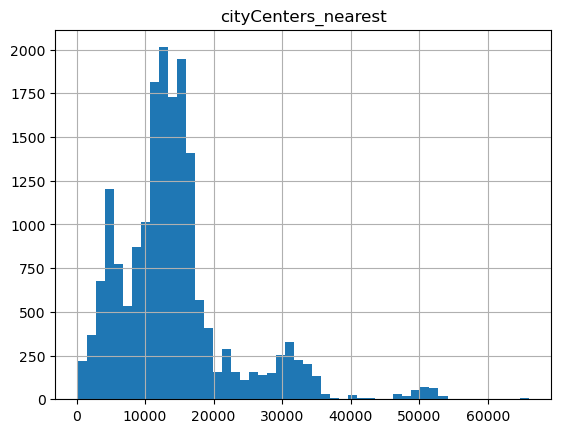

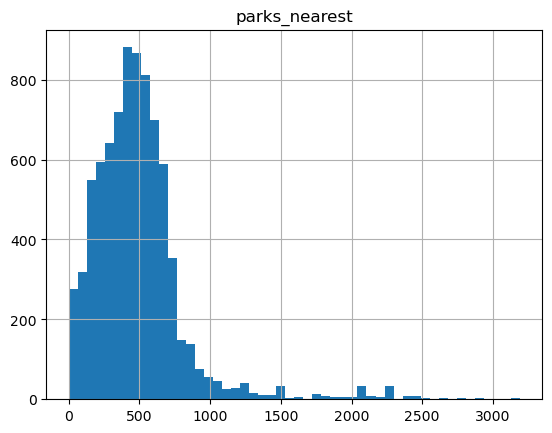

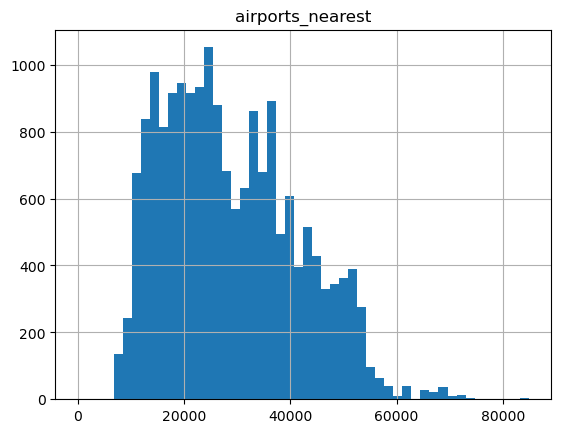

In [25]:
data.hist('cityCenters_nearest', bins = 50)            # удаленность от центра города
plt.show()
data.hist('parks_nearest', bins = 50)                  # удаленность от парка
plt.show()
data.hist('airports_nearest', bins = 50)               # удаленность от аэропорта
plt.show()

Распределение на графике удаленности от центра города в диапазоне от 10 до 15 км имеет выраженый пик. Это может указывать на то, что основная масса квартир продается в спальных районах или пригородах.

Удаленность от парков имеет пик в района 500 м, что неудивительно, ведь продавцы могут считать парком даже маленькие посадки и указывать их в объявлении.

Удаленность от аэродрома, который обычно находится за городом составляет от 10 до 50 км.

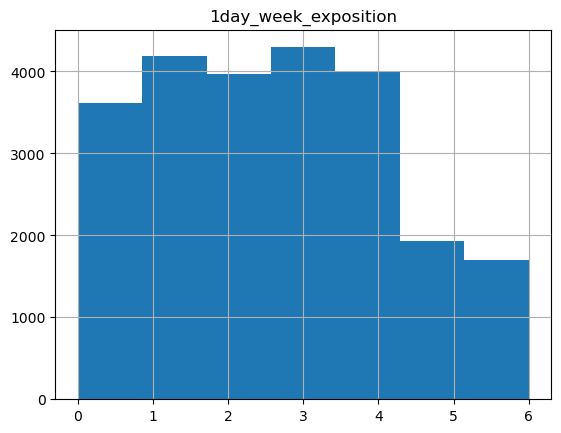

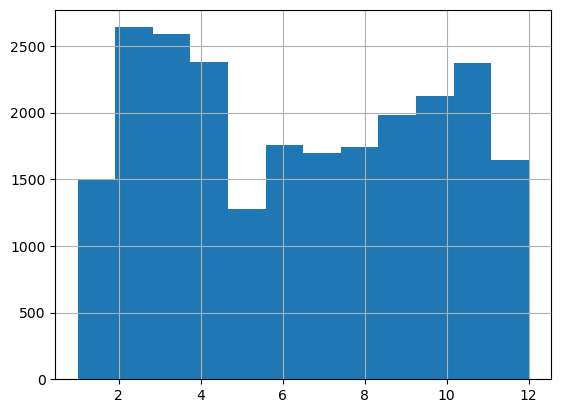

In [26]:
data.hist(['1day_week_exposition'], bins = 7)            # день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
plt.show()  
data['1day_month_exposition'].dt.month.hist(bins = 12)   # месяц публикации объявления
plt.show()

Объявления публикуются больше в рабочие дни, в среднем в 2 раза чаще, чем в выходные.

По месяцам самыми активными можно выделить февраль, март, апрель и ноябрь. Минимальная активность в мае.

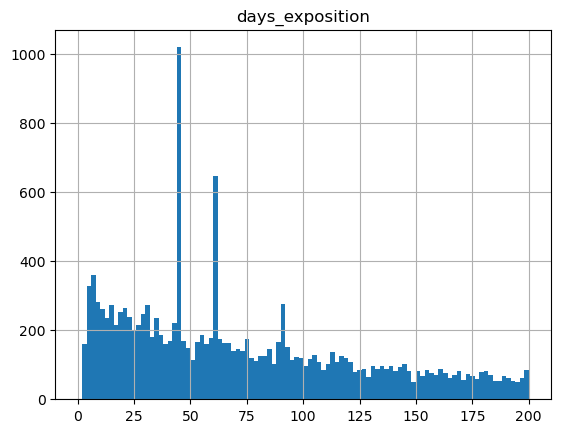

In [27]:
data.hist('days_exposition', bins = 100, range = (0, 200))   # продолжительность экспозиции в днях
plt.show()

In [28]:
print('Среднее значение продолжительности показа квартир:', round(data['days_exposition'].mean(),1))
print('Медианное значение продолжительности показа квартир:', data['days_exposition'].median())

Среднее значение продолжительности показа квартир: 180.9
Медианное значение продолжительности показа квартир: 95.0


Медианное значение продолжительности показа квартир 95 дней более точно отражает картину на рынке. Основная часть квартир продается в диаппазоне от 45 до 232 дней. Даже если на квартиру сразу находится покупатель необходимо время на сбор документов и подготовку сделки, обычно на это уходит не менее 2-х недель. По этому сделки через 45 дней после размещения объявления можно отнести к "быстрым".

Есть квартиры, которые по определенным причинам продаются очень долго, обычно это связано с документами на квартиру. Такие квартиры значительно увеличивают среднее значение.

Посмотрим зависимость цены квартиры от параметров квартиры и данных объявления

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.653678,0.585786,0.514159
total_area,0.653678,1.000000,0.946075,0.660518
living_area,0.585786,0.946075,1.000000,0.503032
kitchen_area,0.514159,0.660518,0.503032,1.000000


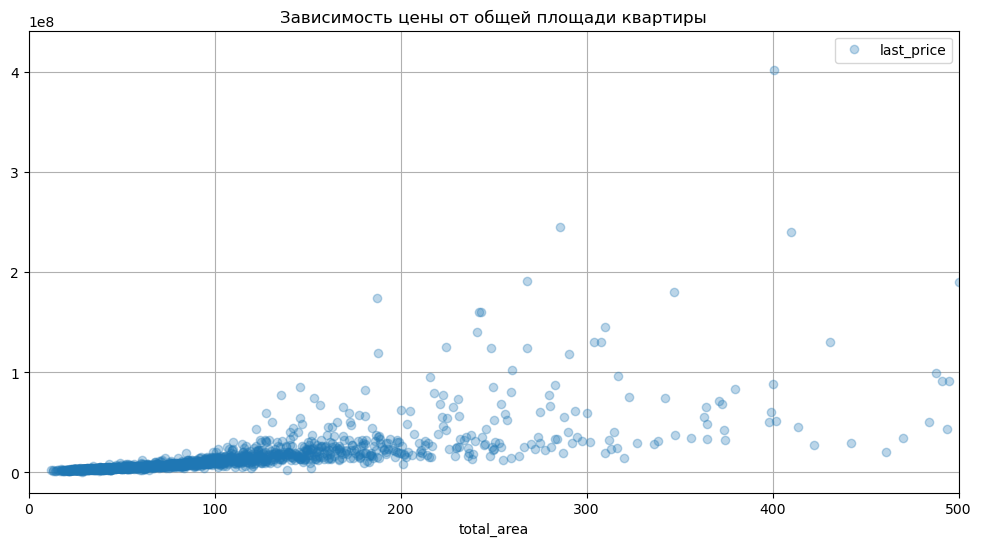

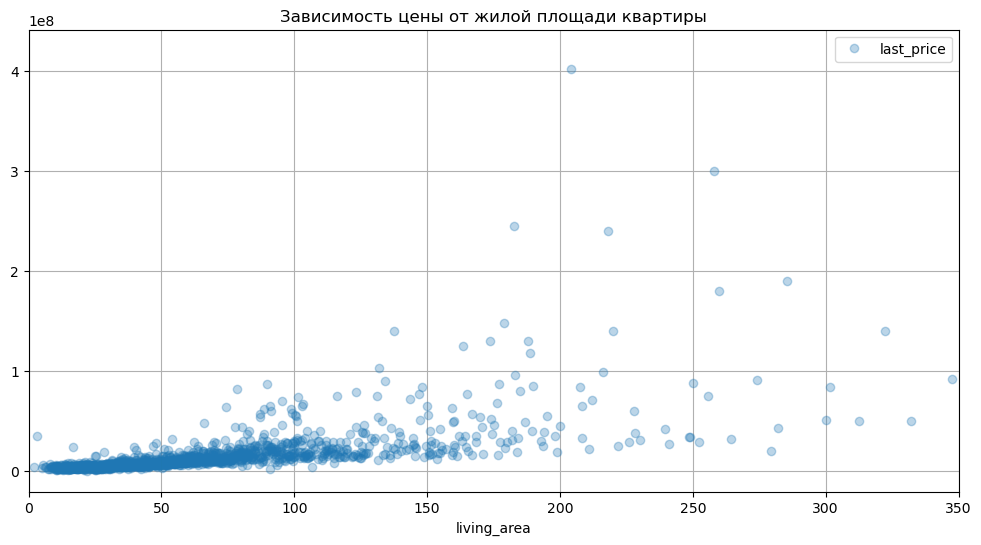

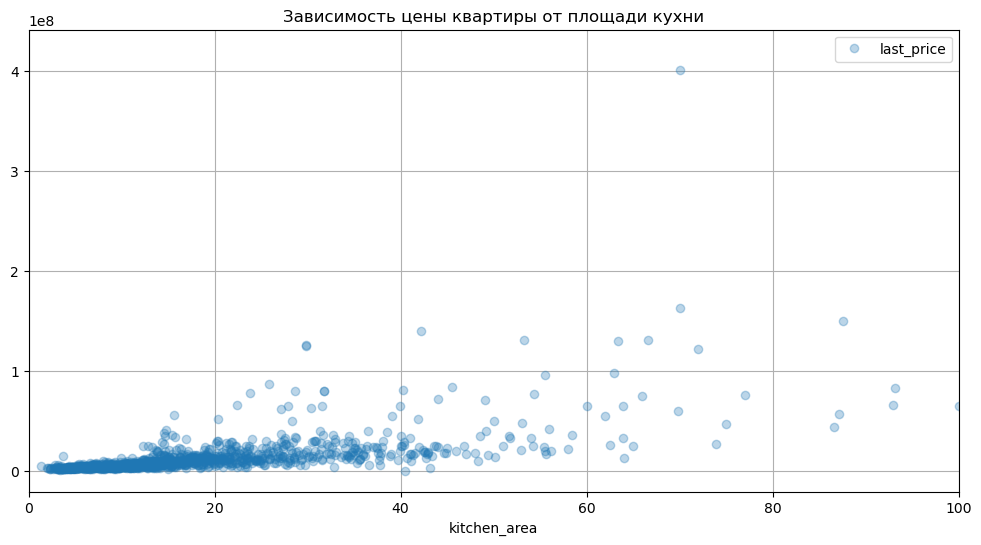

In [29]:
data2 = data[['last_price', 'total_area', 'living_area', 'kitchen_area']]
display(data2.corr())
data_pvt_total = data.pivot_table(index = 'total_area',
                                  values = 'last_price',
                                  aggfunc = 'median')
data_pvt_total.plot(style = 'o', xlim = (0, 500), alpha = 0.3, grid = True, figsize = (12, 6),
                    title = 'Зависимость цены от общей площади квартиры')
plt.show()

data_pvt_total = data.pivot_table(index = 'living_area',
                                  values = 'last_price',
                                  aggfunc = 'median')
data_pvt_total.plot(style = 'o', xlim = (0, 350), alpha = 0.3, grid = True, figsize = (12, 6),
                    title = 'Зависимость цены от жилой площади квартиры')
plt.show()

data_pvt_total = data.pivot_table(index = 'kitchen_area',
                                  values = 'last_price',
                                  aggfunc = 'median')
data_pvt_total.plot(style = 'o', xlim = (0, 100), alpha = 0.3, grid = True, figsize = (12, 6),
                    title = 'Зависимость цены квартиры от площади кухни')
plt.show()

**Вывод:**

Коэффициенты корреляции и графики показывают, что стоимости квартир прямо зависят от ее общей площади, жилой площади и площади кухни. Коэффициенты корреляции 0.653678, 0.585786, 0.514159 соответственно. При увеличении площади квартир разброс цен за квадратный метр увеличивается, т к добавляется новое и элитное жилье с большим метражом, увеличивается и разброс цен на квартиры. С учетом уменьшения кол-ва квартир, при увеличении метража, разброс цен становится еще более заметным.

,price_metr,rooms,floor
price_metr,1.000000,0.055418,0.129069
rooms,0.055418,1.000000,-0.150862
floor,0.129069,-0.150862,1.000000


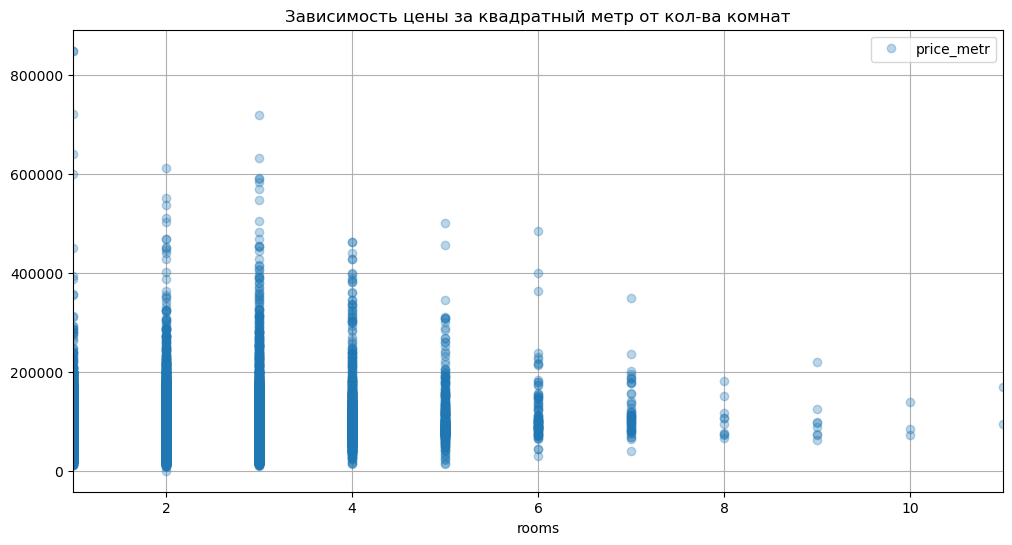

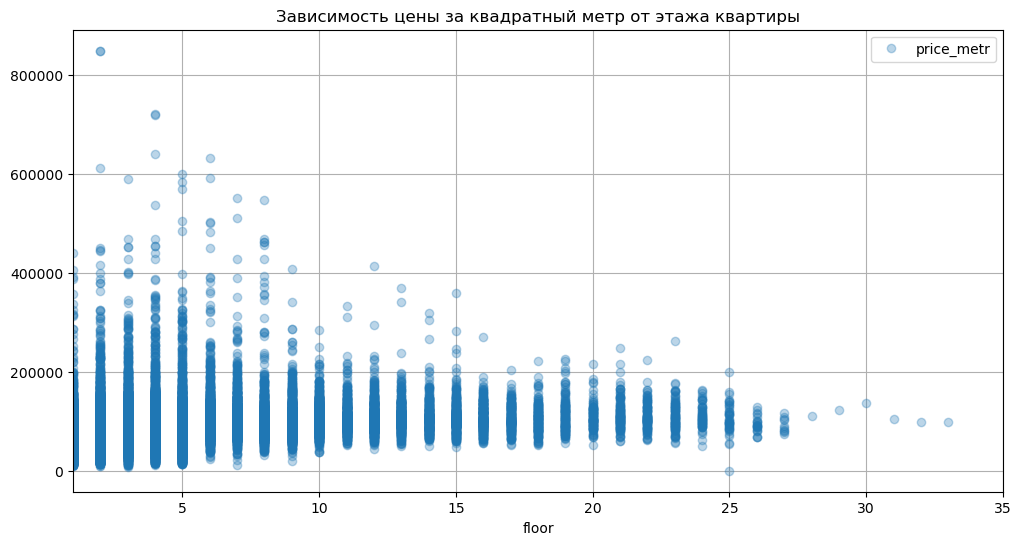

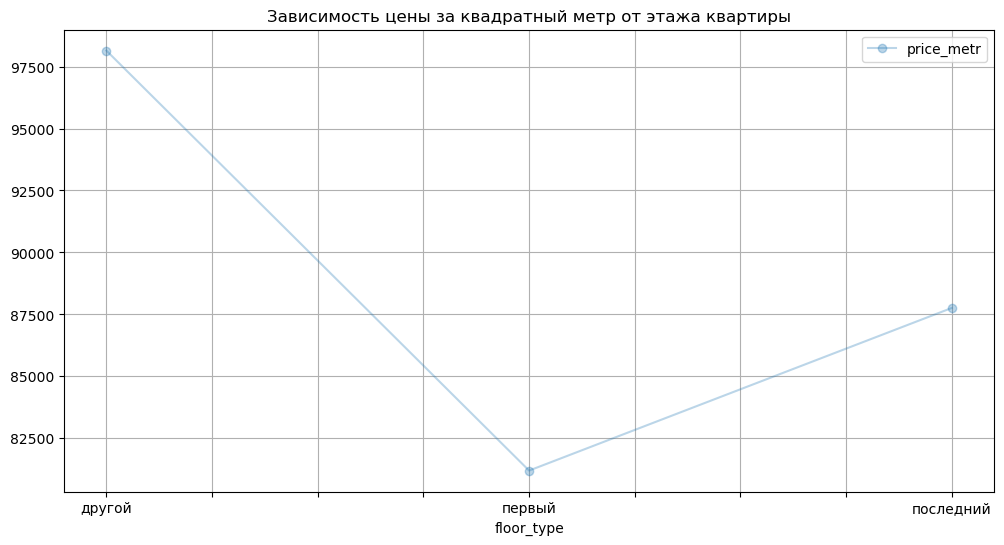

In [30]:
data3 = data[['price_metr', 'rooms', 'floor']]
display(data3.corr())

(data
    .query('last_price < 100000000 and total_area < 650 and rooms > 0')
    .plot(
    x = 'rooms',
    y = 'price_metr',
    style = 'o',
    xlim = (1, 11),
    alpha = 0.3,
    title = 'Зависимость цены за квадратный метр от кол-ва комнат',
    grid = True,
    figsize = (12, 6))
)
plt.show()

(data
    .query('last_price < 100000000 and total_area < 650 and rooms > 0')
    .plot(
    x = 'floor',
    y = 'price_metr',
    style = 'o',
    xlim = (1, 35),
    alpha = 0.3,
    title = 'Зависимость цены за квадратный метр от этажа квартиры',
    grid = True,
    figsize = (12, 6))
)
plt.show()

(data
    .query('last_price < 100000000 and total_area < 650 and rooms > 0')
    .pivot_table(index = 'floor_type', values = 'price_metr', aggfunc = 'median')
    .plot(
    style = 'o-',
    alpha = 0.3,
    title = 'Зависимость цены за квадратный метр от этажа квартиры',
    grid = True,
    figsize = (12, 6))
)
plt.show()

**Вывод:**

Коэффициенты корреляции и графики показывают, что стоимости квартир прямо зависят от количества комнат и этажа расположения. Коэффициенты корреляции 0.055418 и 0.129069 соответственно. При увеличении количества комнат увеличивается и общий метраж квартиры, ее цена растет. Аналогично с этажом расположения. Много квартир в 5-ти, 9-ти, и т д домах старой постройки. Но строятся новые жилые районы, по этому в объявлениях с этажом квартиры более 12 доля квартир новостроек возрастает, а метраж в новосторойках больше, чем в старых домах. Соответственно опять цена квартир растет.

Цена квадратного метра в квартирах на 1-х этажах ниже, чем на последнем этаже дома и заметно ниже, чем на других этажах. Такая тенденция действительно есть, но в конкретной выборке оказывает влияние низкая стоимость квадратного метра недвижимости в деревнях и поселках, особенно, когда вдоме всего 1 этаж.

In [31]:
data4 = data.loc[:, ['last_price', '1day_week_exposition', '1day_month_exposition', '1day_year_exposition']]
data4['1day_month_exposition'] = data['1day_month_exposition'].dt.month
display(data4.corr())

,last_price,1day_week_exposition,1day_month_exposition,1day_year_exposition
last_price,1.000000,0.001550,0.002779,-0.043089
1day_week_exposition,0.001550,1.000000,0.011496,-0.004799
1day_month_exposition,0.002779,0.011496,1.000000,-0.269642
1day_year_exposition,-0.043089,-0.004799,-0.269642,1.000000


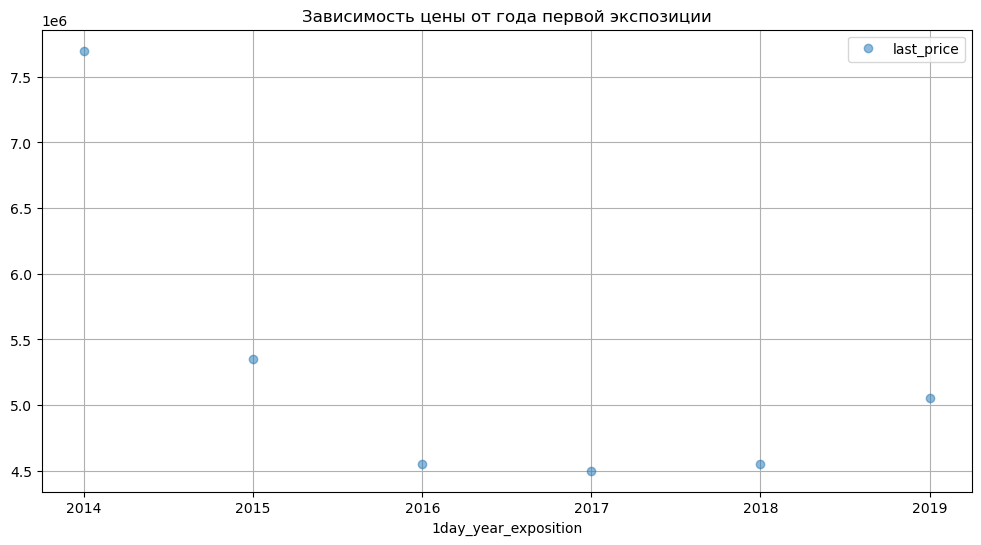

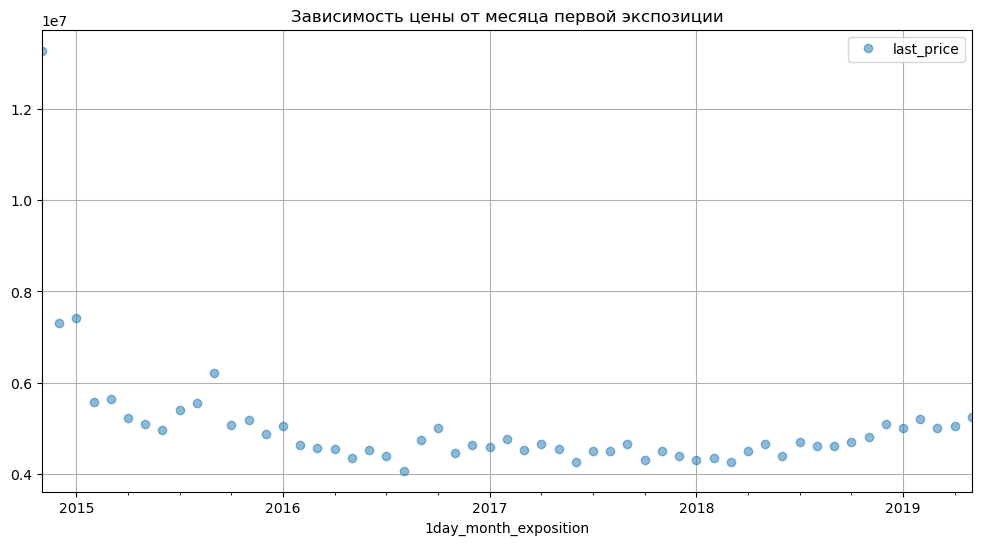

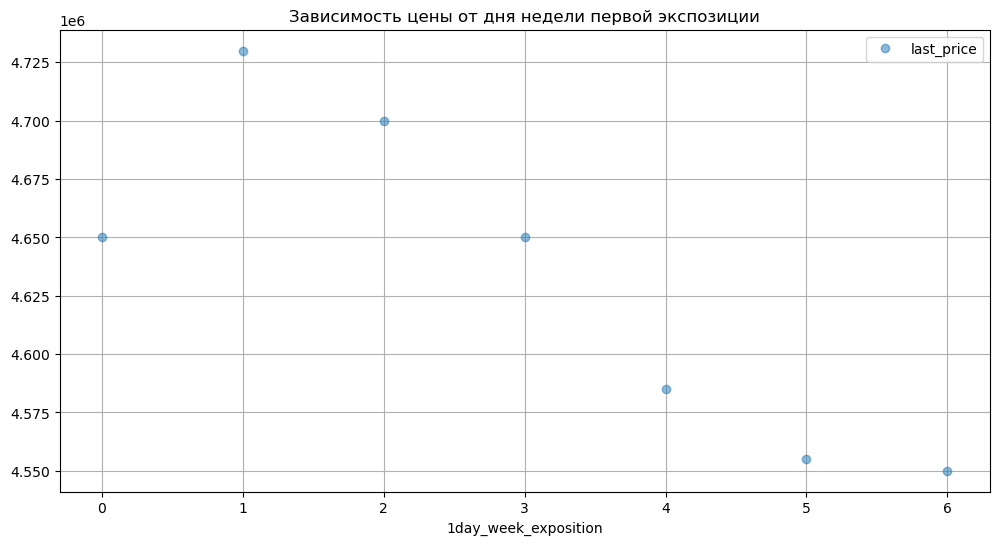

In [32]:
data_pvt_total = data.pivot_table(index = '1day_year_exposition',
                                  values = 'last_price',
                                  aggfunc = 'median')
data_pvt_total.plot(style = 'o', alpha = 0.5, grid = True, figsize = (12, 6),
                    title = 'Зависимость цены от года первой экспозиции')
plt.show()

data_pvt_total = data.pivot_table(index = '1day_month_exposition',
                                  values = 'last_price',
                                  aggfunc = 'median')
data_pvt_total.plot(style = 'o', alpha = 0.5, grid = True, figsize = (12, 6),
                    title = 'Зависимость цены от месяца первой экспозиции')
plt.show()

data_pvt_total = data.pivot_table(index = '1day_week_exposition',
                                  values = 'last_price',
                                  aggfunc = 'median')
data_pvt_total.plot(style = 'o', alpha = 0.5, grid = True, figsize = (12, 6),
                    title = 'Зависимость цены от дня недели первой экспозиции')
plt.show()

**Вывод:**

Коэффициенты корреляции показывают, что стоимости квартир мало зависят от даты, месяца или года подачи объявления о продаже квартиры.

На графиках в "годах" и "месяцах" видно, что в конце 2014г (самая ранняя дата в датасете '2014-11-27') цена была значительно выше. Подорожание квартир связано с событиями в Крыму. В 2015-2017 цена снижалась. Начиная с 2018 цены опять начинают расти.

Зависимость цены от дня недели подачи, как мне кажется, следующая. Больше объявлений подают в рабочие дни. В понедельник люди выходят на работу и после выходных не все находят время для размещения объявления о продаже квартиры. Во вторник время находится почти у всех желающих, мы видим подъем цены на графике. Далее в рабочие дни цена снижается и в выходные цена минимальная.

Вот ссылка на похожее исследование 2017г
https://new-retail.ru/novosti/retail/analitiki_vyyasnili_luchshiy_den_i_vremya_dlya_razmeshcheniya_onlayn_reklamy3343/?ysclid=laa4n7sdxi249840957


In [33]:
# Так выглядит список стоимостью квадратного метра в десяти городах
# с самым большим кол-вом объявлений
top_city = data.pivot_table(index = 'locality_name',
                            values = 'price_metr',
                            aggfunc = ['count', 'mean'])
top_city.columns = ['count', 'price_per_metr']
display(top_city.sort_values('count', ascending = False).head(10))

# Так выглядит список населённых пунктов отсортированный по стоимости квадратного метра
display(data.pivot_table(index = 'locality_name',
                         values = 'price_metr',
                         aggfunc = 'mean').sort_values('price_metr', ascending = False))

,count,price_per_metr
locality_name,,
Санкт-Петербург,15721,114848.966539
посёлок Мурино,556,85682.398302
посёлок Шушары,440,78676.773653
Всеволожск,398,68653.303373
Пушкин,369,103126.929580
Колпино,338,75424.529237
посёлок Парголово,327,90176.481137
Гатчина,307,68746.282267
деревня Кудрово,299,92472.323239


,price_metr
locality_name,
Зеленогорск,115117.745686
Санкт-Петербург,114848.966539
посёлок Репино,104233.259417
Пушкин,103126.929580
Сестрорецк,101759.005843
...,...
посёлок Совхозный,12629.129129
деревня Выскатка,12335.480902
деревня Вахнова Кара,11688.311688


**Вывод:**

- В представленном датасете подавляющее кол-во квартир продается в Санкт-Петербурге - 15721 шт. (66%).

- Самая большая стоимость квадратного метра в Зеленогорске - 115117 руб, второе место занимает Санкт-Петербург - 114848 руб.

- Самая маленькая стоимость квадратного метра в деревне Старополье 11205 руб.

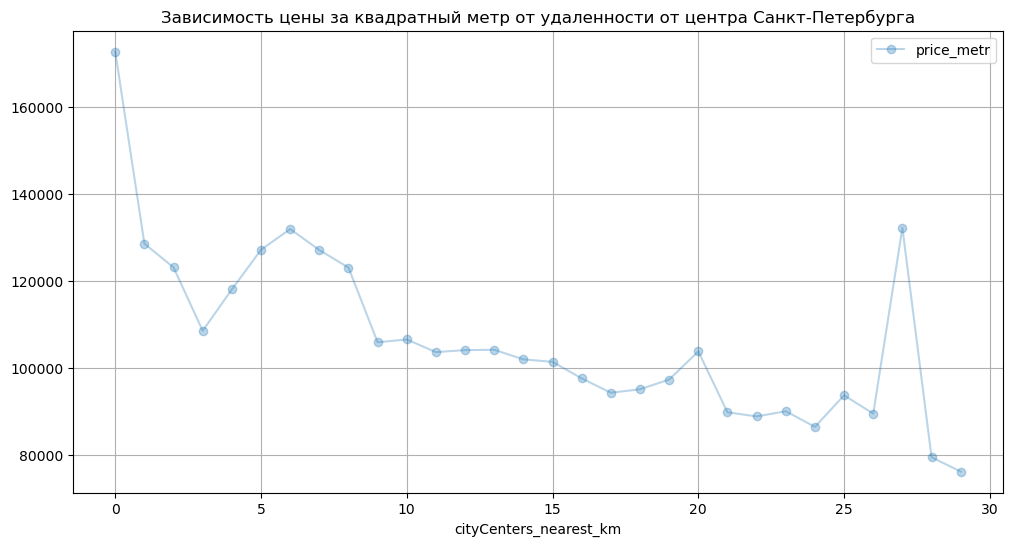

In [34]:
data_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km',
                                                                        values = 'price_metr',
                                                                        aggfunc = 'median')
(
    data_spb
    .plot(
    style = 'o-',
    alpha = 0.3,
    title = 'Зависимость цены за квадратный метр от удаленности от центра Санкт-Петербурга',
    grid = True,
    figsize = (12, 6))
)
plt.show()

In [35]:
print('Стоимость квадратного метра квартир при удалении от центра Санкт-Петербурга уменьшается в среднем на:', round((data_spb['price_metr'].max() - data_spb['price_metr'].min())/ data_spb.index.max()), 'руб')

Стоимость квадратного метра квартир при удалении от центра Санкт-Петербурга уменьшается в среднем на: 3330 руб


**В ходе реализации проекта выполнено:**

- Изучена структура и общая информация представленного датасета.

- Определены колонки с пропущенными значениями, с явными и неявными дубликатами, некорректно введенными данными.

- Там где это возможно, внесены исправления в данные.

- Оптимизирована структура датасета с 3.7мб до 1.8мб.

- Добавлены новые колонки с вычисленными аналитиками, для удобства обработки и представления данных.

- Полученный датасет изучен с целью нахождения особенностей и зависимостей, которые существуют на рынке недвижимости.

- Сформулированы выводы и построены наглядные диаграммы.

<a id=4></a>
[Содержание](#0)
# Итоговый вывод:

- В представленном датасете содержится информация по объявлениям о продаже недвижимости за период '2014-11-27' по 2019-05-01.

- В конце 2014г цена была значительно выше, что связано с событиями в Крыму. В 2015-2017 цена снижалась. Начиная с 2018 цены опять начали расти.

- Подавляющее кол-во квартир продается в Санкт-Петербурге - 15721 шт. (66%).

- Максимальна стоимость квадратного метра в Зеленогорске - 115117 руб, второе место занимает Санкт-Петербург - 114848 руб.

- Минимальная стоимость квадратного метра в деревне Старополье - 11205 руб.

- Основное кол-во квартир на рынке составляют однокомнатные и двухкомнатные квартиры площадью 40-50 кв.м., типовая кухня имеет размер в пределах от 7 до 12 кв.м.

- Основное кол-во продаваемых квартир на ходятся на 2-8 этажах здания.

- Цена квадратного метра в квартирах на 1-х этажах ниже, чем на последнем этаже дома и заметно ниже, чем на других этажах.

- Основная масса квартир продается в спальных районах или пригородах.

- Медианное значение стоимости квартир: 4.65 млн.руб.

- Медианное значение продолжительности показа квартир: 95 дней.